In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [10]:
X = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
y = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
history = model.fit(X, y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 6ms/step - loss: 24.8208
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 24.1660
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 23.5100
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 22.8533
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 22.1964
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 21.5393
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 20.8828
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 20.2274
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 19.5736
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 18.9217
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 18.2724
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 17.6261
Epoch 13/500
1/1 [==============================]

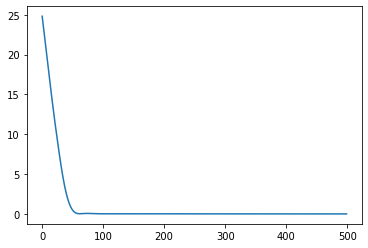

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [33]:
print("Prediction for X=10:", model.predict([[10]]))

1/1 [==============================] - 0s 80ms/step
Prediction for X=10: [[30.526928]]


In [38]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [47]:
X, y = make_classification(n_samples = 1000, n_features=10, n_informative=5, n_redundant=2, n_classes=2)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [61]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

Epoch 1/20
13/13 [==============================] - 2s 33ms/step - loss: 0.7689 - accuracy: 0.5000 - val_loss: 0.7182 - val_accuracy: 0.5250
Epoch 2/20
13/13 [==============================] - 0s 9ms/step - loss: 0.7141 - accuracy: 0.5450 - val_loss: 0.6723 - val_accuracy: 0.5900
Epoch 3/20
13/13 [==============================] - 0s 8ms/step - loss: 0.6734 - accuracy: 0.5913 - val_loss: 0.6382 - val_accuracy: 0.6200
Epoch 4/20
13/13 [==============================] - 0s 9ms/step - loss: 0.6435 - accuracy: 0.6538 - val_loss: 0.6105 - val_accuracy: 0.6650
Epoch 5/20
13/13 [==============================] - 0s 9ms/step - loss: 0.6169 - accuracy: 0.7088 - val_loss: 0.5871 - val_accuracy: 0.7200
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5931 - accuracy: 0.7362 - val_loss: 0.5649 - val_accuracy: 0.7550
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 0.5700 - accuracy: 0.7600 - val_loss: 0.5424 - val_accuracy: 0.7800
Epoch 8/20
13/13 [=

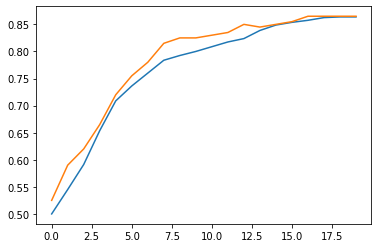

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

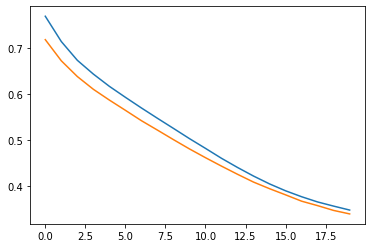

In [64]:

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

In [68]:
from tensorflow.keras.datasets import mnist

In [69]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [72]:
X_train = X_train/255.0
X_test = X_test/255.0

y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128,activation = 'relu'),
    Dense(64,activation = 'relu'),
    Dense(10,activation = 'softmax')
])

model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

history = model.fit(
    X_train,
    y_train,
    validation_data = (X_test,y_test),
    epochs = 10,
    batch_size = 64,
)

Epoch 1/10
938/938 [==============================] - 7s 6ms/step - loss: 2.3015 - accuracy: 0.1120 - val_loss: 2.3009 - val_accuracy: 0.1135
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3006 - val_accuracy: 0.1135
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 2.3004 - accuracy: 0.1124 - val_loss: 2.2987 - val_accuracy: 0.1135
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 2.2939 - accuracy: 0.1186 - val_loss: 2.2814 - val_accuracy: 0.1148
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 2.2483 - accuracy: 0.1706 - val_loss: 2.1936 - val_accuracy: 0.1940
Epoch 

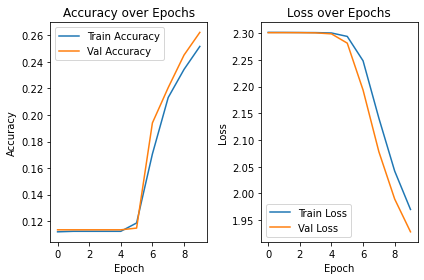

In [75]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()

plt.tight_layout()
plt.show()